In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [3]:
import sys
import os
 
# getting the current directory
current = os.getcwd()
 
# Getting the parent directory
parent = os.path.dirname(current)
 
# adding the parent directory to the sys.path.
sys.path.append(parent)
 
from FMTSClust import *
import numpy as np
import pandas as pd

In [19]:
# STEP 1 - DATA EXTRACTION
# use glob to get all the csv files 
# in the folder
path = "./Data_csv"

df = getSIMAGROdata(path)
df.shape

(19105, 7)

In [20]:
df = df.rename(columns={"Temp": "Temperature", "RelHum": "RelatHumidity", "Rain":"Rainfall"})
df.to_csv('SIMAGRO_Step1_Output.csv', index=False)

In [21]:
df = pd.read_csv('SIMAGRO_Step1_Output.csv')


In [22]:
df.shape

(19105, 7)

In [23]:
# STEP 1 - PREPROCESSING

# FILTERING

# Years: 2020 - 2023
# Season: october, november, december, january, february and march - 182 days

# one day after, one day before
df_filtered = filterByDate(df, "2020", "2023", "09-30", "04-01")

In [24]:
df_filtered.shape

(9899, 7)

In [25]:
#quality checking

QC_missing_null_values(df_filtered,"simagro")

Maximum number of measurements: 10374
Real number of measurements: 9899
Missing measurements: 475
Missing Values (%): 0.045787545787545784

Null values: 12
%: 0.001156737998843262


In [26]:
#quality checking

QC_outliers(df_filtered)

Upper_limit_T: 32.29895833333333
Lower_limit_T: 12.173958333333331
Temperature Outliers: 136
Upper_limit_RH: 108.01041666666669
Lower_limit_RH: 44.09374999999999
Relative Humidity Outliers: 65
Upper_limit_RF: 1.5000000000000002
Lower_limit_RF: -0.9000000000000001
Rainfall Outliers: 2126
Upper_limit_SR: 24.302500000000002
Lower_limit_SR: 0.08249999999999602
Solar Radiation Outliers: 22


In [27]:
df_filtered.to_csv('SIMAGRO_Step2_Output.csv', index=False)

In [40]:
# STEP 3 - FEATURE ENGINEERING

# aggregation
df = pd.read_csv('SIMAGRO_Step2_Output.csv')

In [41]:
df.shape

(9899, 7)

In [42]:
columns=['Temperature','RelatHumidity','Rainfall','SolarRad']
df_days = daily_aggregation(df,columns)

Minimum and maximum values for each variable:
> Temperature:
Min: 12.17ºC     Max: 29.88ºC

> Relative Humidity:
Min: 45.03%      Max: 95.73%

> Rainfall:
Min: 0.0"       Max: 1.5"

> Solar Radiation:
Min: 1.61 MJm2  Max: 17.84 MJm2



In [43]:
columns=['Temperature','RelatHumidity','Rainfall','SolarRad']
df_std = standardization(df_days, columns)

In [44]:
df_days.shape

(3458, 6)

In [45]:
df_std.shape

(3458, 6)

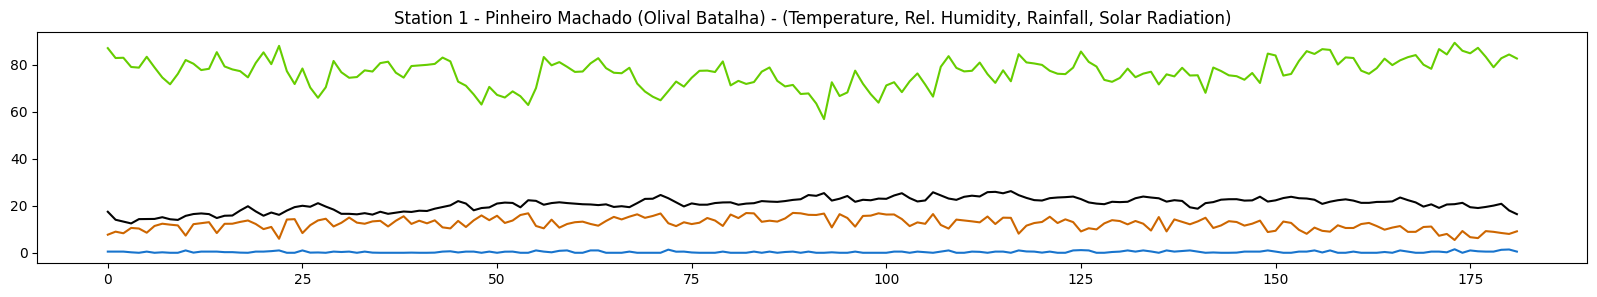

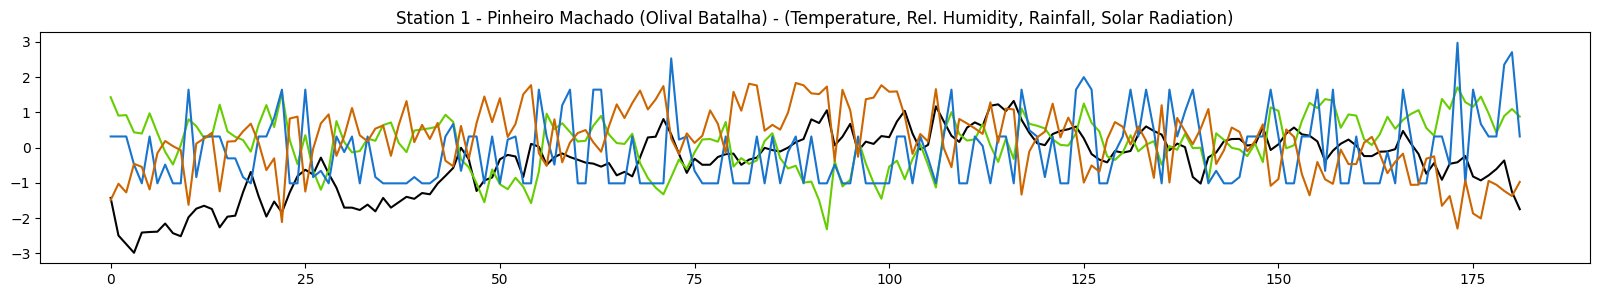

In [46]:
# Comparing Normal and Standardized Data
stations_list = df_days['StationID'].unique()
allColumns=['Temperature', 'RelatHumidity', 'Rainfall', 'SolarRad']

# DOY = 90 = March 31
doy_lower = 90
# DOY = 274 = October 1
doy_upper = 274

df_array = transform_dfTS_to_3Darray_DOYsorted(df_days,allColumns,doy_lower, doy_upper)
plot_first_TS(df_array,stations_list)

df_array_std = transform_dfTS_to_3Darray_DOYsorted(df_std,allColumns,doy_lower, doy_upper)
plot_first_TS(df_array_std,stations_list)

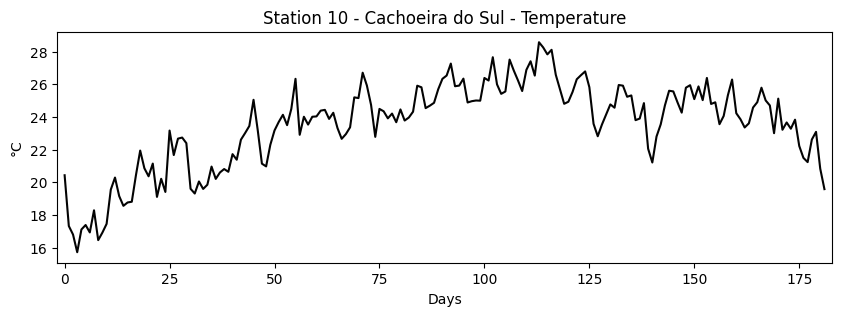

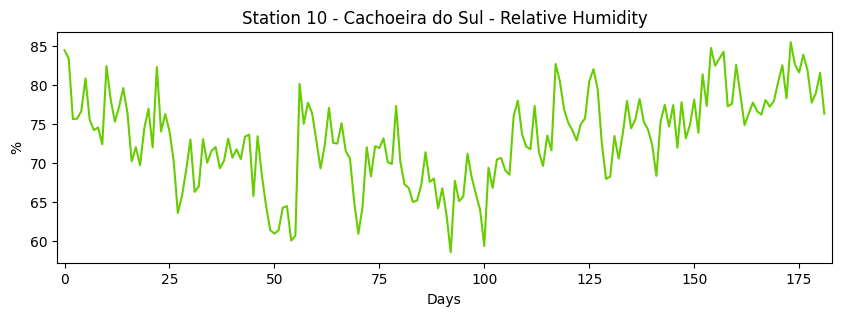

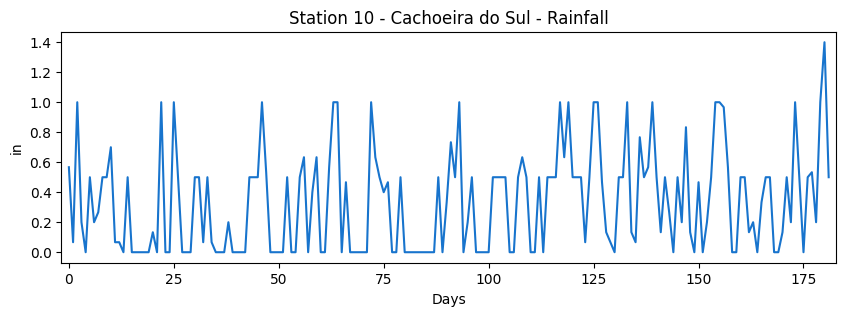

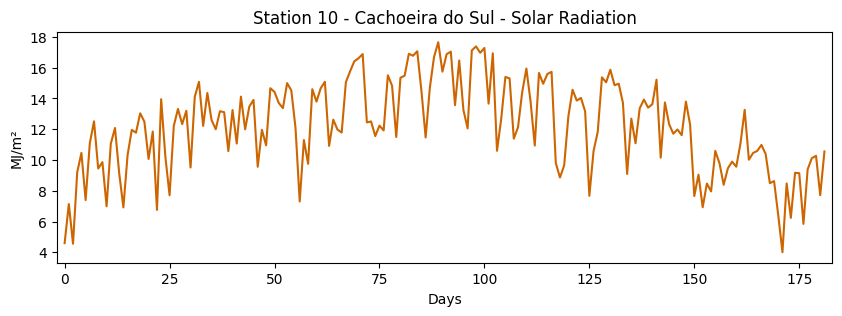

In [47]:
# Visualizing independent variables
plot_TS_by_index_separated_variables(df_array, stations_list, 9)

In [48]:
df_std.to_csv('SIMAGRO_Step3_Output.csv', index=False)

In [4]:
# STEP 4 - CLUSTERING

df_std = pd.read_csv('SIMAGRO_Step3_Output.csv')
df_std.dtypes

StationID          int64
doy                int64
Temperature      float64
RelatHumidity    float64
Rainfall         float64
SolarRad         float64
dtype: object

In [5]:
df_std.shape

(3458, 6)

In [6]:
allColumns=['Temperature', 'RelatHumidity', 'Rainfall', 'SolarRad']

# DOY = 90 = March 31
doy_lower = 90
# DOY = 274 = October 1
doy_upper = 274

df_array_std = transform_dfTS_to_3Darray_DOYsorted(df_std,allColumns,doy_lower,doy_upper)
df_array_std.shape

(19, 182, 4)

In [7]:
unique_station_ids = df_std['StationID'].unique()

stations = pd.read_csv('StationsList.csv')
names = stations[['StationName','StationID']]
names_sort = names.sort_values(by=['StationID'])
names_sort.head()

,StationName,StationID
0,Pinheiro Machado (Olival Batalha),1
1,Piratini (Olival Olivae),2
2,São Sepé (Olival Prosperato),3
3,Itaqui (Vimaer),4
4,Maçambara (Fazenda Espinilho),5


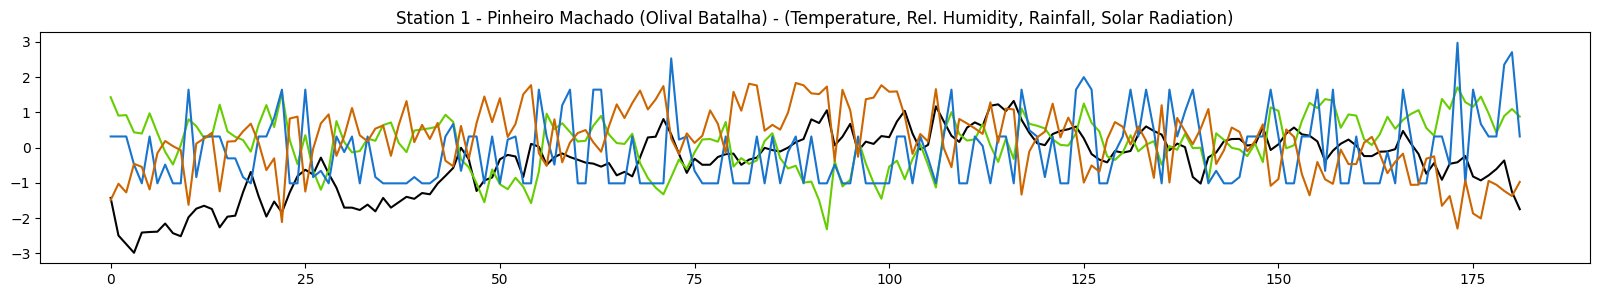

In [8]:
stations_list = df_std['StationID'].unique()
plot_first_TS(df_array_std,stations_list)

In [9]:
flattened_df_std = flatten_multivariate_time_series(df_array_std)
flattened_df_std.head()

,station0_feature0,station0_feature1,station0_feature2,station0_feature3,station1_feature0,station1_feature1,station1_feature2,station1_feature3,station2_feature0,station2_feature1,...,station16_feature2,station16_feature3,station17_feature0,station17_feature1,station17_feature2,station17_feature3,station18_feature0,station18_feature1,station18_feature2,station18_feature3
0,-1.425302,1.429263,0.316360,-1.486027,-1.892384,2.239621,-0.126318,-2.564100,-0.661974,1.190720,...,0.980378,-2.024616,-0.358990,1.479211,0.980378,-1.979883,-1.651996,1.760812,2.042807,-1.929781
1,-2.490744,0.907396,0.316360,-1.023186,-2.647126,1.515035,0.316360,-1.847174,-1.601354,0.844531,...,-1.011675,-0.985014,-0.698054,0.784249,0.980378,-0.326540,-1.716875,0.874672,-1.011675,-0.303278
2,-2.736239,0.922036,0.316360,-1.268921,-2.752323,1.595561,0.316360,-1.562372,-2.216994,0.909118,...,0.980378,-0.961753,-0.819334,0.319219,0.980378,-1.446662,-1.827723,0.723537,0.980378,-0.451793
3,-2.979778,0.434616,-0.480461,-0.456565,-2.973910,0.896431,0.316360,-0.798923,-2.336209,0.073787,...,-0.214854,-1.307094,-1.238274,-0.498458,-0.480461,0.110057,-2.699833,0.710620,-1.011675,-0.559153
4,-2.406630,0.400169,-1.011675,-0.546031,-2.365986,0.631823,-1.011675,-0.444636,-1.736545,0.130624,...,-0.746068,0.412454,-1.146335,0.352805,0.980378,-0.958174,-1.889341,-0.187147,-1.011675,0.600334


In [10]:
flattened_df_std.shape

(182, 76)

Clusters = 2  Silhouette Score: 0.276
Clusters = 3  Silhouette Score: 0.180
Clusters = 4  Silhouette Score: 0.164
Clusters = 5  Silhouette Score: 0.167
Clusters = 6  Silhouette Score: 0.172
Clusters = 7  Silhouette Score: 0.185
Clusters = 8  Silhouette Score: 0.163
Clusters = 9  Silhouette Score: 0.152
Clusters = 10  Silhouette Score: 0.132


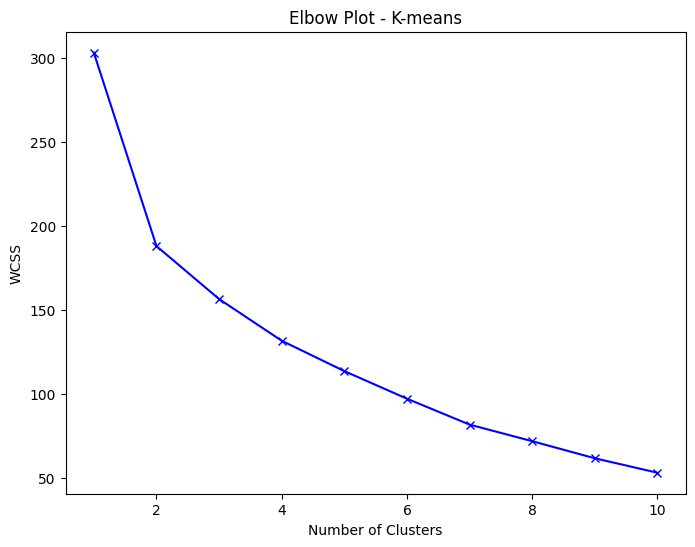

In [11]:
# K-MEANS

# Silhouette Score and Elbow Plot
sil_and_elbow_scores_TSKMeans(df_array_std,11,"euclidean",10,150)

Cluster 0
RMSE for station 0: 0.3762111071704184
RMSE for station 1: 0.31633215413697235
RMSE for station 2: 0.3348861332886557
RMSE for station 3: 0.459685270308941
RMSE for station 4: 0.37666863531335076
RMSE for station 5: 0.4334857051835524
RMSE for station 6: 0.49969669062130423
RMSE for station 7: 0.5733638296909259
RMSE for station 8: 0.6089176986248395
RMSE for Cluster 0: 0.44213858048210675
Cluster 1
RMSE for station 0: 0.38515306014184203
RMSE for station 1: 0.4581909347811963
RMSE for station 2: 0.5331256763162298
RMSE for station 3: 0.5151771270688834
RMSE for station 4: 0.7881753660448717
RMSE for station 5: 0.4746355031160997
RMSE for station 6: 0.4413686466534596
RMSE for station 7: 0.4432452832917875
RMSE for station 8: 0.6019971538682456
RMSE for station 9: 0.6503235838211757
RMSE for Cluster 1: 0.5291392335103791
Average Cluster RMSE: 0.4856389069962429


0.4856389069962429

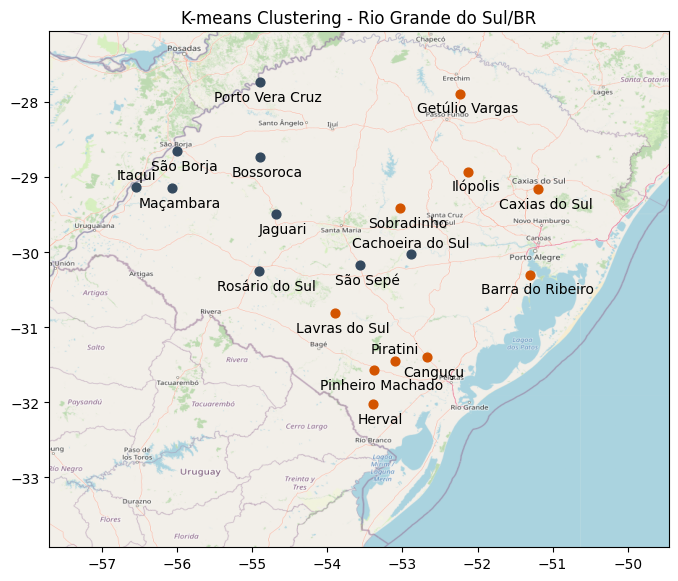

In [12]:
# K = 2
n_clusters=2
y_pred_Kmeans_std = cluster_labels_TSKmeans(df_array_std,n_clusters,"euclidean",10,50)
stations_map = stations[stations.StationID.isin(unique_station_ids) == True]
plot_map_clustering_names(stations_map,y_pred_Kmeans_std, "K-means Clustering - Rio Grande do Sul/BR","simagro")

# cluster evaluation
calculate_cluster_rmse(flattened_df_std, y_pred_Kmeans_std)